<a href="https://colab.research.google.com/github/Shridhara-kulal/CNN_Project/blob/main/Model_using_TenserFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [21]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PlantVillage",  # Path to the directory
    shuffle=True,                           # Shuffle the dataset
    image_size=(IMAGE_SIZE, IMAGE_SIZE),    # Resize the images
    batch_size=BATCH_SIZE                   # Batch size
)

class_names = dataset.class_names
print("Class Names:", class_names)


Found 2164 files belonging to 3 classes.
Class Names: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


Image Batch Shape: (32, 256, 256, 3)
Labels Batch: [2 1 0 0 0 1 1 2 0 0 1 0 1 1 1 1 0 1 1 2 0 0 0 1 1 0 2 0 0 1 0 1]


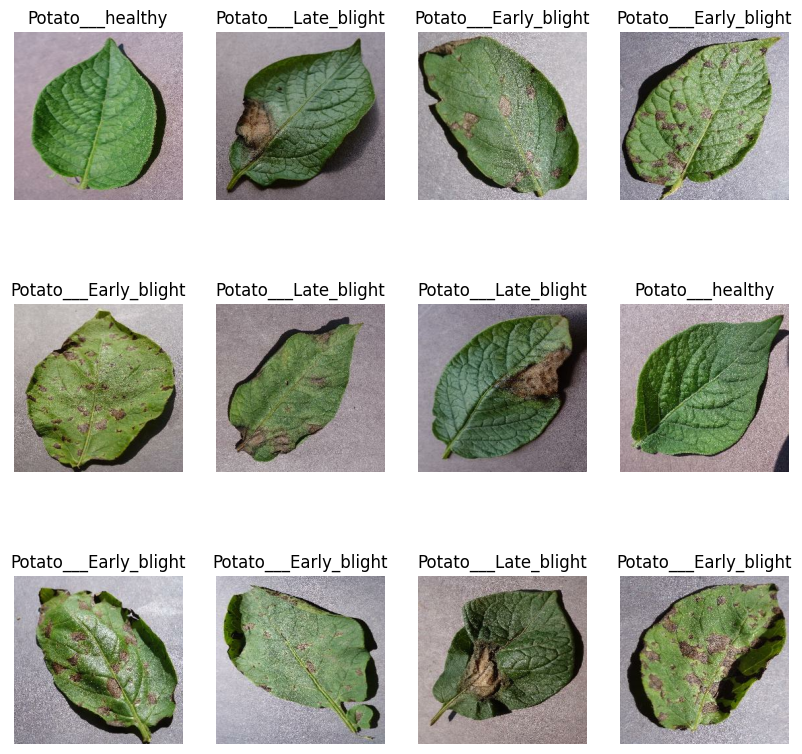

In [22]:
for image_batch, labels_batch in dataset.take(1):
    print("Image Batch Shape:", image_batch.shape)
    print("Labels Batch:", labels_batch.numpy())

plt.figure(figsize=(10,10))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

In [23]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.2, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [24]:
# Hyperparameters
IMAGE_SIZE = 128  # or any size suitable for your use case
CHANNELS = 3
num_filters = [32, 64, 64, 64, 64, 64]
kernel_sizes = [(3, 3)] * 6
conv_activation = 'relu'
dense_units = 64
dense_activation = 'relu'


In [25]:

def create_flexible_model(num_filters, kernel_sizes, conv_activation, dense_units, dense_activation):
    resize_and_rescale = tf.keras.Sequential([
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1.0/255)
    ])

    data_augmentation = tf.keras.Sequential([
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.2)
    ])

    input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
    n_classes = 3

    model = models.Sequential()
    model.add(resize_and_rescale)
    model.add(data_augmentation)

    for filters, kernel_size in zip(num_filters, kernel_sizes):
        model.add(layers.Conv2D(filters, kernel_size=kernel_size, activation=conv_activation, padding='same'))
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation=dense_activation))
    model.add(layers.Dense(n_classes, activation='softmax'))

    return model



In [26]:
model = create_flexible_model(num_filters, kernel_sizes, conv_activation, dense_units, dense_activation)
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))  # Batch size is None for flexibility
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 sequential_5 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50
)


Epoch 1/50
54/54 [==============================] - 23s 219ms/step - loss: 0.8506 - accuracy: 0.5799 - val_loss: 0.7001 - val_accuracy: 0.6683
Epoch 2/50
54/54 [==============================] - 2s 33ms/step - loss: 0.4854 - accuracy: 0.8194 - val_loss: 0.4463 - val_accuracy: 0.8462
Epoch 3/50
54/54 [==============================] - 2s 32ms/step - loss: 0.3384 - accuracy: 0.8553 - val_loss: 0.2510 - val_accuracy: 0.9159
Epoch 4/50
54/54 [==============================] - 1s 27ms/step - loss: 0.2205 - accuracy: 0.9126 - val_loss: 0.4713 - val_accuracy: 0.7957
Epoch 5/50
54/54 [==============================] - 1s 26ms/step - loss: 0.1776 - accuracy: 0.9317 - val_loss: 0.1774 - val_accuracy: 0.9255
Epoch 6/50
54/54 [==============================] - 1s 26ms/step - loss: 0.1102 - accuracy: 0.9566 - val_loss: 0.1087 - val_accuracy: 0.9567
Epoch 7/50
54/54 [==============================] - 1s 26ms/step - loss: 0.1689 - accuracy: 0.9346 - val_loss: 0.1822 - val_accuracy: 0.9327
Epoch 8/50


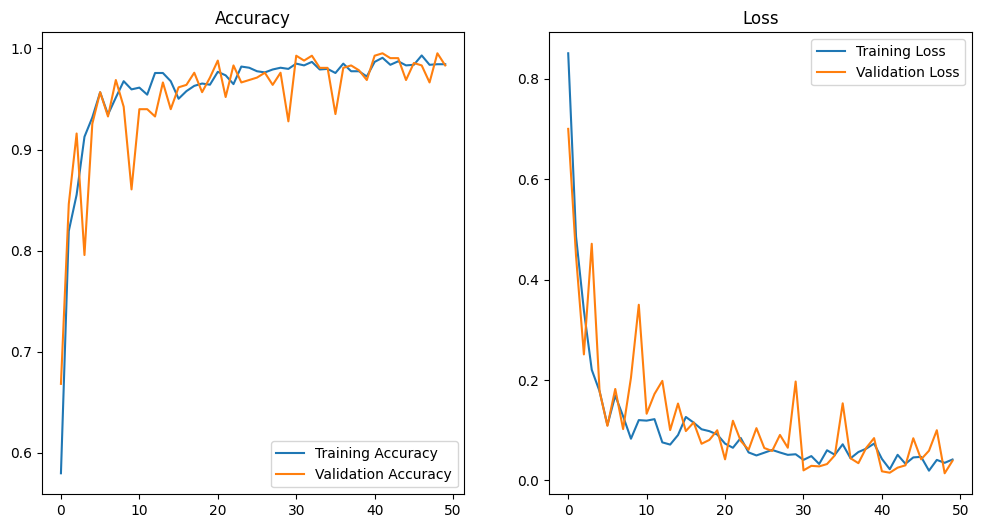

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [29]:
scores = model.evaluate(test_ds)
print(f"Test Loss: {scores[0]}, Test Accuracy: {scores[1]}")


1/1 [==============================] - 7s 7s/step - loss: 0.0447 - accuracy: 0.9688
Test Loss: 0.044696029275655746, Test Accuracy: 0.96875


1/1 [==============================] - 0s 17ms/step


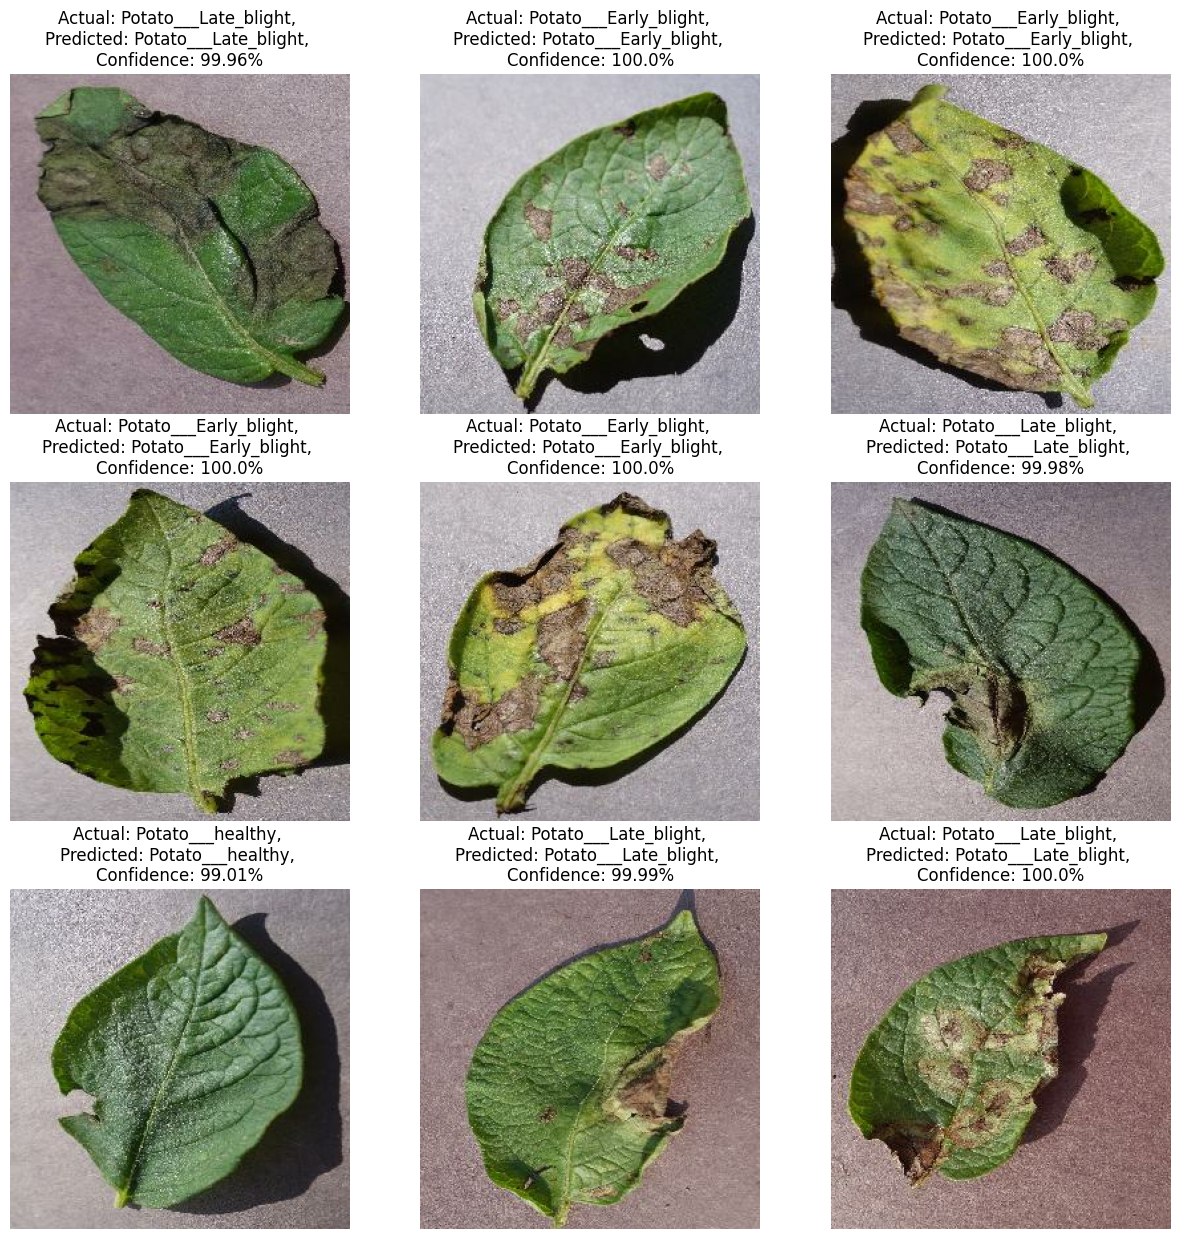

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \nPredicted: {predicted_class}, \nConfidence: {confidence}%")
        plt.axis("off")

plt.show()
